In [1]:
import joblib
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
plt.rc('font',family='Times New Roman')
# from paddlets.utils.utils import plot_anoms

In [2]:
datain=pd.read_csv("datainner.csv")
dataou=pd.read_csv("dataouter.csv")
datafa=pd.read_excel("Problem_C_Data_Wordle.xlsx")
datainfer=pd.read_csv("datainfer.csv")

In [3]:
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
transfer = MinMaxScaler(feature_range=(0, 1))
onehot = LabelEncoder()

In [4]:
dispersions = []
silhouettescore=[]
calinskiscore=[]
daviesscore=[]
X=np.array(datainfer)
for k in range(2, 10):
    kmedoids = KMedoids(n_clusters=k, random_state=0).fit(X)
    labels=kmedoids.labels_
    dispersions.append(kmedoids.inertia_)
    score1=silhouette_score(X,labels)
    score2=calinski_harabasz_score(X,labels)
    score3=davies_bouldin_score(X,labels)
    silhouettescore.append(score1)
    calinskiscore.append(score2)
    daviesscore.append(score3)

In [27]:
def ploty(A,B,C,D,fig,ax):
    # fig, ax = plt.subplots(figsize=(15,5))
    # fig.subplots_adjust(right=0.75)

    twin1 = ax.twinx()
    twin2 = ax.twinx()
    twin3 = ax.twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines.right.set_position(("axes", 1.08))
    twin3.spines.right.set_position(("axes", 1.16))

    p1, = ax.plot(range(2,10), A, "-", label="SSE",linewidth=5,color="#4D5655")
    p2, = twin1.plot(range(2,10), B, "-", label="Silhouette Score",linewidth=5,color="#637493")
    p3, = twin2.plot(range(2,10), C, "-", label="Calinski Harabasz Score", linewidth=5,color="#B69D4B")
    p4, = twin3.plot(range(2,10), D, "-", label="Davies Bouldin Score", linewidth=5,color="#A39797")

    ax.set_xlim(2, 10)
    # ax.set_ylim(0, 2)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax.set_xlabel("Cluster Number")
    ax.set_ylabel("SSE")
    twin1.set_ylabel("Silhouette Score")
    twin2.set_ylabel("Calinski Harabasz Score")
    twin3.set_ylabel("Davies Bouldin Score")

    ax.yaxis.label.set_color(p1.get_color())
    twin1.yaxis.label.set_color(p2.get_color())
    twin2.yaxis.label.set_color(p3.get_color())
    twin3.yaxis.label.set_color(p4.get_color())

    tkw = dict(size=4, width=1.5)
    ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
    twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
    twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
    twin3.tick_params(axis='y', colors=p4.get_color(), **tkw)
    ax.tick_params(axis='x', **tkw)

    ax.legend(handles=[p1, p2, p3,p4],loc=5)

    # plt.show()

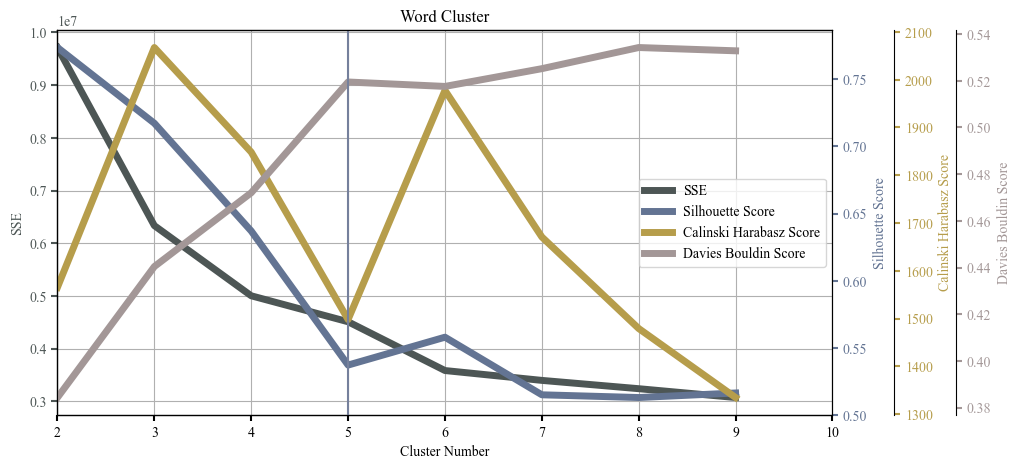

In [29]:
fig, axs = plt.subplots(1,1,figsize=(10, 5))
ax=plt.subplot(1,1,1)
ploty(dispersions,silhouettescore,calinskiscore,daviesscore,fig,ax)
ax.set_title("Word Cluster")
ax.xaxis.grid(True)
ax.yaxis.grid(True)
plt.axvline(5,color="#75809C")
plt.savefig("Cluster index.svg")
plt.savefig("Cluster index",dpi=800)
plt.show()

In [7]:
X=np.array(datainfer)
kmedoids=KMedoids(n_clusters=5, random_state=0).fit(X)
labels=kmedoids.labels_

In [15]:
datacluster=datainfer.copy()
datacluster["cluster"]=kmedoids.labels_
datacluster=datacluster.join(datafa["Word"])
datacluster=datacluster[["Word","cluster"]].sort_values(by="cluster")
datacluster

,Word,cluster
0,manly,0
139,khaki,0
140,hunky,0
141,label,0
142,glean,0
...,...,...
272,fewer,4
271,shawl,4
270,natal,4
298,sweet,4


In [128]:
datacluster.to_csv("datacluster.csv")

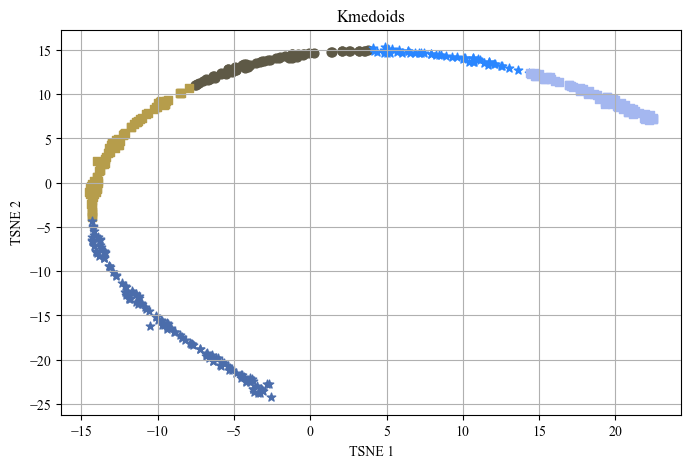

In [10]:
X=np.array(datainfer)
# 可视化（在tsne聚类的结果下可视化）
from sklearn.manifold import TSNE

colors = ["#5E5946","#B69D4B","#2A86FF","#A4B7F0","#4B6DAB"]
shapes = ["o","s","*","s","*"]
## TSNE降维
tsne = TSNE(n_components=2,random_state=2)
X_tsne = tsne.fit_transform(X)
X = X_tsne[:,0]
Y = X_tsne[:,1]
## 可视化
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
for ii in np.unique(labels):
    index = labels == ii
    ax.scatter(X[index],Y[index],color = colors[ii],
               marker = shapes[ii],s = 40,alpha = 1)
ax.set_xlabel("TSNE 1")
ax.set_ylabel("TSNE 2")
ax.xaxis.grid(True)
ax.yaxis.grid(True)
plt.title("Kmedoids")
plt.savefig("Cluster.svg")
plt.show()

In [21]:
df3=datainfer.copy()
df3["cluster"]=datacluster["cluster"]
import plotly.express as px
import plotly
df4 = df3[['1 Try', '2 Tries', '3 Tries', '4 Tries', '5 Tries', '6 Tries',
       'Above 6 Tries','cluster']]
## 安德鲁曲线
fig=px.parallel_coordinates(df4,dimensions=df4.columns,color = "cluster",
                              ## 设置颜色映射,及其中心值
                              color_continuous_scale=["#5E5946","#B69D4B","#2A86FF","#A4B7F0","#4B6DAB"],
                              color_continuous_midpoint=2,
                              width=800,height=400,title = "")
fig.show()
plotly.offline.plot(fig, filename='file1.html')

'file1.html'

In [31]:
df4long = df4.melt(value_vars = ['1 Try', '2 Tries', '3 Tries', '4 Tries', '5 Tries', '6 Tries',
       'Above 6 Tries'],
                   var_name="tries",value_name="value",id_vars=["cluster"])
df4long

,cluster,tries,value
0,0,1 Try,0.01
1,2,1 Try,0.01
2,0,1 Try,0.01
3,2,1 Try,0.01
4,2,1 Try,0.01
...,...,...,...
2508,4,Above 6 Tries,0.03
2509,4,Above 6 Tries,0.01
2510,4,Above 6 Tries,0.02
2511,4,Above 6 Tries,0.01


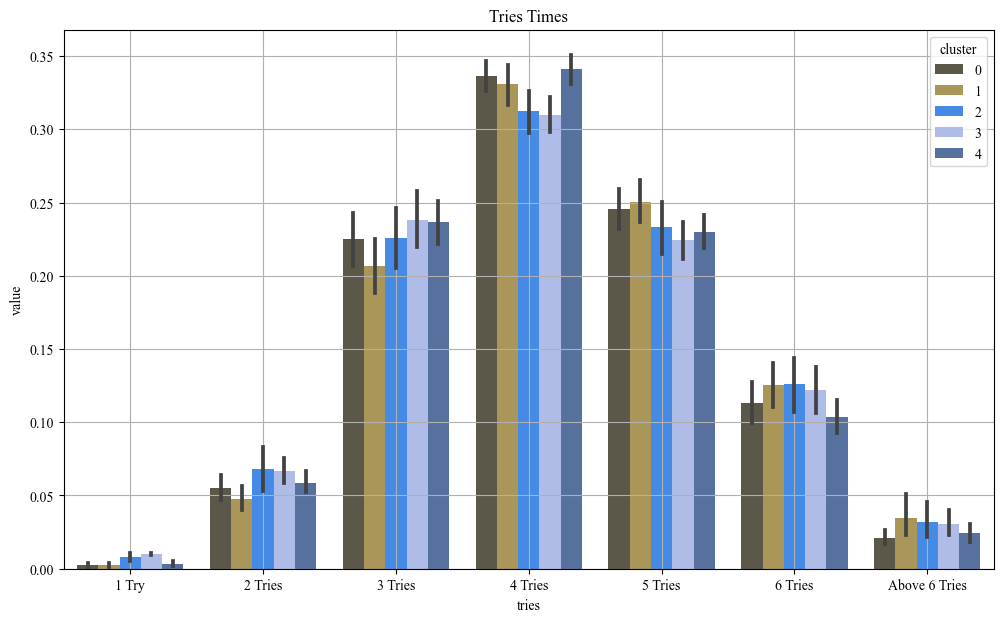

In [32]:
## 可视化不同分组下的数据得分情况
plt.figure(figsize=(12,7))
sns.barplot(data=df4long,x="tries", y="value",hue="cluster",palette = ["#5E5946","#B69D4B","#2A86FF","#A4B7F0","#4B6DAB"])
plt.grid()
plt.title("Tries Times")
plt.savefig("Tries Times.svg")
plt.show()

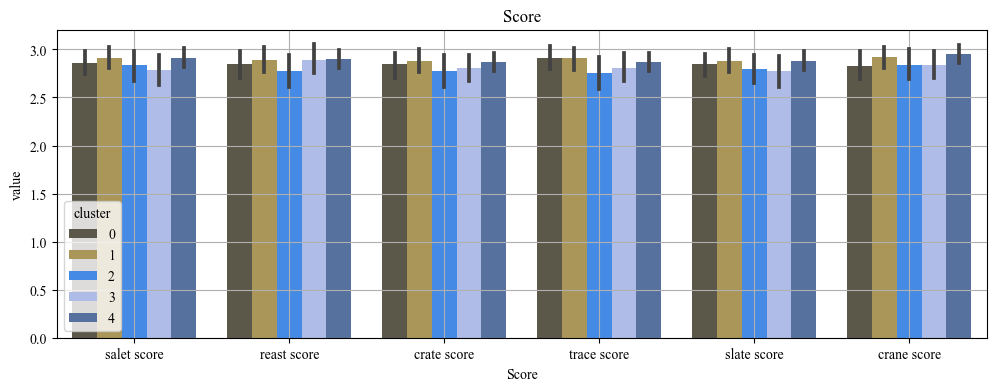

In [33]:
df4 = df3[['salet score',  'reast score', 'crate score',
       'trace score', 'slate score', 'crane score',"cluster"]]
df4long = df4.melt(value_vars = ['salet score',  'reast score', 'crate score',
       'trace score', 'slate score', 'crane score'],
                   var_name="Score",value_name="value",id_vars=["cluster"])
## 可视化不同分组下的数据得分情况
plt.figure(figsize=(12,4))
sns.barplot(data=df4long,x="Score", y="value",hue="cluster",palette = ["#5E5946","#B69D4B","#2A86FF","#A4B7F0","#4B6DAB"])
plt.grid()
plt.title("Score")
plt.savefig("score.svg")

In [66]:
pre=pd.read_csv("datainfer_pre.csv")

In [67]:
X=np.array(datainfer)
kmedoids=KMedoids(n_clusters=5, random_state=0)
kmedoids.fit(X)

KMedoids(n_clusters=5, random_state=0)

In [68]:
kmedoids.predict(np.array(pre))

array([4], dtype=int64)